# Setup

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#I am using the Amazon Dataset provided in the project proposal assignment
#load in the graph
amazon_data = nx.read_edgelist("C:\\Users\\roynguyen987\\Documents\\CSCI 4220 Social Networks and Informatics\\AmazonData\\Amazon0302.txt", comments='#', create_using= nx.DiGraph(),  delimiter=' ', nodetype=int, data=True, edgetype=None,  encoding='utf-8')





# Analysis

In [27]:
#Basic Graph Data
num_edges = amazon_data.number_of_edges() #number of edges
num_nodes = amazon_data.number_of_nodes() #number of nodes
avg_degree = float(num_edges) / num_nodes
print("Nodes:", num_nodes)
print("Edges:", num_edges)
print("Average Degree:", avg_degree)

Nodes: 262111
Edges: 1234877
Average Degree: 4.711274994181855


In [3]:
#example of indegree and outdegrees

print("In degree of node 3:", amazon_data.in_degree[3])
print("Out degree of node 3:", amazon_data.out_degree[3])

#this example means that one item is is frequently bought with node3/item3 and node3/item is frequently bought with 5 other items.

In degree of node 3: 1
Out degree of node 3: 5


This network is a network based on items that are frequently purchased with another item. 

The edges are directed so if an item is bought frequently in a purchase with some other item, that node will have a directed edge towards the other item/node.

Looking at the average degree, this means that on average, each item has about 4 to 5 specific items that you may see be commonly purchased alongside it.

The influence of whether it was bought from another item is based on the out-degree centrality of the node as the graph is directed. The in-degree centrality of a node shows how influential the product is itself in the purchase of another item. My interpretation of this is that some items may classify as add/ons or extensions of other items which mean they are frequently bought with an item and some items serve a whole function and is extended off of which are the items with a high in_degree.

Top Ranked Nodes (Node, PageRank): 
(4429, 0.00045087519282973503)
(33, 0.00042945261960373337)
(8, 0.0003443314393635732)
(93, 0.00030904003146334615)
(481, 0.0003086952667744699)
(9106, 0.00028408285427146407)
(14949, 0.00028223150356889386)
(2501, 0.0002803524296986222)
(151, 0.00027836373343657)
(1241, 0.0002557716278209549)
In degree of node 4429 : 404
In degree of node 33 : 361
In degree of node 8 : 293
In degree of node 93 : 219
In degree of node 481 : 275
In degree of node 9106 : 227
In degree of node 14949 : 420
In degree of node 2501 : 191
In degree of node 151 : 85
In degree of node 1241 : 218


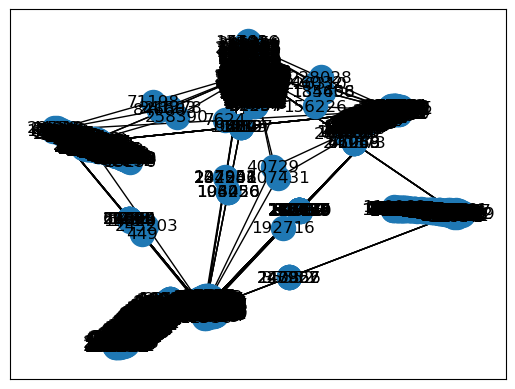

In [49]:
amazon_pagerank= nx.pagerank(amazon_data, alpha=0.8)
pr_sorted = sorted(amazon_pagerank.items(), key=lambda x:x[1], reverse = True)#sorting the highest page ranks to lowest
pr_sorted_head = pr_sorted[:10]
print("Top Ranked Nodes (Node, PageRank): ")
for node in pr_sorted_head:
    print(node)
top_ranked_nodes = []

for node in pr_sorted_head:
    print("In degree of node", node[0], ":" ,amazon_data.in_degree[node[0]])
    top_ranked_nodes.append(node[0])

top_ranked_node_in_edges = amazon_data.in_edges(top_ranked_nodes) #in edges show which items are bought with these top ranked items
trn_subgraph = amazon_data.edge_subgraph(top_ranked_node_in_edges)
nx.draw_networkx(trn_subgraph)
#this information could be very insightful to know which item purchases are influenced by these items

The cell above shows the top ranked pages or nodes in the graph. The interpretation of the pagerank in this graph is that these nodes are the items that have many items or "important" items purchased with it. This could be useful to figure out which items lead to the most total sales of other items and other "important" items. Important items may be defined as other items who also contribute to the sales of other items.

So from the example above, whatever item is classified as node 4429 and 33 etc. are the most "important" nodes in the graph which means they likely are the items that lead to the sales for many other items.

I also printed the in_degree of the top 10 nodes to show how many items are frequently copurchased with that item.

This graph shows what item purchases are influenced by the top 10 nodes in the graph.
Visually it is hard to see due to the large amount of edges pointing to these high ranked nodes. With a larger canvas it might be a little bit more visible. However, this image shows the degree to which these nodes/items are influencing other purchases.

The information on the rank of these items could be very useful in understanding which products are performing very well in terms of influence and not just single purchases.


In [75]:
amazon_adj_list = list(nx.generate_adjlist(amazon_data))
print(amazon_adj_list[:10])


def predict_link(prediction_node): #This function will predict links based on the amount of common neighbors
    succ_pred_node = set(amazon_data.successors(prediction_node))
    for node in amazon_data.nodes():
        succ_node = set(amazon_data.successors(node)) #find the list of successors in common of the node you are trying to predict to every node in the network
        common_succ = (succ_pred_node & succ_node)
        if(len(common_succ) >= 2): #threshold for how many common neighbors they must have
            print("Predicted link to from:",prediction_node, "to", node) 
            
            #note some of these links may already exist. The links that do not already exist are the real predictions.
        
predict_link(5)
predict_link(12)
predict_link(24)


['0 1 2 3 4 5', '1 0 2 4 5 15', '2 0 11 12 13 14', '3 63 64 65 66 67', '4 7 16 17 18 19', '5 6 7 8 9 10', '15 68 69 70 71 72', '11 6 9 20 25 26', '12 260 261 262 263 264', '13 20 21 23 140 141']
Predicted link to from: 5 to 5
Predicted link to from: 5 to 11
Predicted link to from: 5 to 7
Predicted link to from: 5 to 17
Predicted link to from: 5 to 6
Predicted link to from: 5 to 20
Predicted link to from: 5 to 30
Predicted link to from: 5 to 290
Predicted link to from: 5 to 137
Predicted link to from: 5 to 139
Predicted link to from: 5 to 154
Predicted link to from: 5 to 176
Predicted link to from: 5 to 210
Predicted link to from: 5 to 313
Predicted link to from: 5 to 668
Predicted link to from: 5 to 504
Predicted link to from: 5 to 5316
Predicted link to from: 5 to 6383
Predicted link to from: 5 to 6665
Predicted link to from: 5 to 11993
Predicted link to from: 5 to 14158
Predicted link to from: 5 to 20578
Predicted link to from: 5 to 28197
Predicted link to from: 5 to 23459
Predicted 

This is an adjancency list of 10  within the amazon data graph which shows the successor for each node in the list. These list represent the list of items that the source node is purchased with usually. I believe these list are very important in this kind of network because it indicates which items are closely related to the item. 

This information could help understand which items could be useful with the source item in the list. This could have applications shopping for christmas gifts or finding good relevant ingredients to a recipe when shopping online.

The function above takes in a node that you want to predict links for. It compares its successors with the successors of every node in the graph and if the graph has 2(chosen threshold) or more common successors with it then it will predict a link between the two nodes.


This could be useful to predict what items could be recommended to other uses to purchase as well. This can be used as the basis of a reccomendation system.

# References

Network X:

Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008

https://networkx.org/documentation

Amazon Dataset:

https://snap.stanford.edu/data/amazon0302.html
J. Leskovec, L. Adamic and B. Adamic. The Dynamics of Viral Marketing. ACM Transactions on the Web (ACM TWEB), 1(1), 2007.